In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelEncoder

In [51]:
df15 = pd.read_csv(r"C:\Users\Manuel\Desktop\3yr Project\15GeV_observables.csv")
df15 = df15.drop(columns=['Unnamed: 0'])



df35 = pd.read_csv(r"C:\Users\Manuel\Desktop\3yr Project\35GeV_observables.csv")
df35 = df35.drop(columns=['Unnamed: 0'])


#train_df = pd.concat(frames)
#train_df.head()



In [38]:
for i in [df15,df35]:
    print(np.unique(i['Incoming muon energy']))

[14900.]
[   43.4   189.  34900. ]


In [39]:


print(df35['Incoming muon energy'].loc[df35['Incoming muon energy']==43.4 ])
print(df35['Incoming muon energy'].loc[df35['Incoming muon energy']==189.])
df35 = df35.drop([319])
df35 = df35.drop([188])


for i in [df15,df35]:
    print(np.unique(i['Incoming muon energy']))


319    43.4
Name: Incoming muon energy, dtype: float64
188    189.0
Name: Incoming muon energy, dtype: float64
[14900.]
[34900.]


In [40]:
dfs = [df15,df35]

df = pd.concat(dfs)

encoder = LabelEncoder()
encoder.fit(df['Incoming muon energy'])
encoded_Y = encoder.transform(df['Incoming muon energy'])

df['enc'] = encoded_Y
print(np.unique(encoded_Y))
df.corr()

[0 1]


,mu-,Incoming muon energy,pi+,pi0,N16,B12,B13,O14,C10,neutron,number Capture neutron,enc
mu-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Incoming muon energy,NaN,1.000000,0.070398,0.069879,0.000032,0.022400,0.022400,0.022400,0.022400,0.077568,0.088533,1.000000
pi+,NaN,0.070398,1.000000,0.598170,0.199512,0.093407,0.569741,-0.001860,0.474474,0.706005,0.689243,0.070398
pi0,NaN,0.069879,0.598170,1.000000,0.188499,-0.002376,0.133256,0.133256,0.540151,0.623407,0.642567,0.069879
N16,NaN,0.000032,0.199512,0.188499,1.000000,-0.000708,-0.000708,-0.000708,-0.000708,0.366426,0.367647,0.000032
B12,NaN,0.022400,0.093407,-0.002376,-0.000708,1.000000,-0.000501,-0.000501,-0.000501,0.033520,0.057270,0.022400
B13,NaN,0.022400,0.569741,0.133256,-0.000708,-0.000501,1.000000,-0.000501,-0.000501,0.191992,0.138322,0.022400
O14,NaN,0.022400,-0.001860,0.133256,-0.000708,-0.000501,-0.000501,1.000000,-0.000501,0.167611,0.158585,0.022400
C10,NaN,0.022400,0.474474,0.540151,-0.000708,-0.000501,-0.000501,-0.000501,1.000000,0.387034,0.381479,0.022400
neutron,NaN,0.077568,0.706005,0.623407,0.366426,0.033520,0.191992,0.167611,0.387034,1.000000,0.977460,0.077568


In [41]:

norm_15 = (df15-df15.mean())/df15.std()



norm_35 = (df35-df35.mean())/df35.std()    



frames = [norm_15,norm_35]
train_df = pd.concat(frames)
train_df= train_df.drop(columns=['Incoming muon energy'])
train_df= train_df.drop(columns=['mu-'])

for i in train_df.columns.tolist():
    if 'loc' in i:
        train_df= train_df.drop(columns=[str(i)])
train_df= train_df.drop(columns=['B12','B13','C10','O14'])
train_df['enc'] = encoded_Y
train_df.head()


<ipython-input-41-f8e4b5db8a42>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  norm_15 = (df15-df15.mean())/df15.std()
<ipython-input-41-f8e4b5db8a42>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  norm_35 = (df35-df35.mean())/df35.std()


,N16,neutron,number Capture neutron,pi+,pi0,enc
0,-0.031623,1.158413,1.995357,-0.054827,-0.077654,0
1,-0.031623,-0.140256,-0.164120,-0.054827,-0.077654,0
2,-0.031623,-0.140256,-0.164120,-0.054827,-0.077654,0
3,-0.031623,-0.140256,-0.164120,-0.054827,-0.077654,0
4,-0.031623,-0.140256,-0.164120,-0.054827,-0.077654,0


In [42]:
train,test= train_test_split(train_df,test_size =0.1, random_state=42)
train_labels = train['enc']
train = train.drop(columns=['enc'])

test_labels = test['enc']
test = test.drop(columns=['enc'])

train.head()

,N16,neutron,number Capture neutron,pi+,pi0
173,-0.031623,-0.140256,-0.164120,-0.054827,-0.077654
824,-0.031623,-0.140256,-0.164120,-0.054827,-0.077654
733,-0.031623,-0.140256,-0.164120,-0.054827,-0.077654
308,-0.031654,-0.158795,-0.182658,-0.110264,-0.132216
205,-0.031654,-0.158795,-0.182658,-0.110264,-0.132216


In [44]:
Adam = None

Adam = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(train.shape[1],)),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(12, activation='tanh'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(train_labels)),activation='sigmoid'),
    ])

opt = keras.optimizers.Adam(learning_rate=0.001)

Adam.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = Adam.fit(train, train_labels, epochs=40, batch_size = 15)



Epoch 1/40
120/120 [==============================] - 0s 818us/step - loss: 0.6950 - accuracy: 0.4588
Epoch 2/40
120/120 [==============================] - 0s 801us/step - loss: 0.6940 - accuracy: 0.4778
Epoch 3/40
120/120 [==============================] - 0s 791us/step - loss: 0.6938 - accuracy: 0.4972
Epoch 4/40
120/120 [==============================] - 0s 765us/step - loss: 0.6935 - accuracy: 0.4939
Epoch 5/40
120/120 [==============================] - 0s 788us/step - loss: 0.6923 - accuracy: 0.5139
Epoch 6/40
120/120 [==============================] - 0s 790us/step - loss: 0.6936 - accuracy: 0.4811
Epoch 7/40
120/120 [==============================] - 0s 813us/step - loss: 0.6917 - accuracy: 0.5122
Epoch 8/40
120/120 [==============================] - 0s 829us/step - loss: 0.6910 - accuracy: 0.5106
Epoch 9/40
120/120 [==============================] - 0s 822us/step - loss: 0.6890 - accuracy: 0.5868
Epoch 10/40
120/120 [==============================] - 0s 803us/step - loss: 0.685

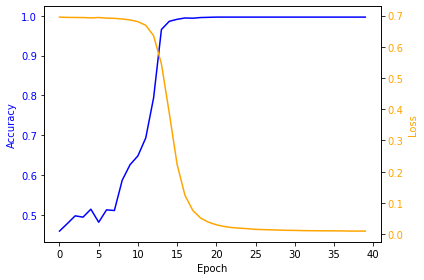

In [45]:
fig,ax1 = plt.subplots()
ax1.set_xlabel('Epoch')
ax1.plot(history.history['accuracy'], label='train',color = 'blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylabel('Accuracy',color='blue')

ax2 = ax1.twinx()
ax2.plot(history.history['loss'],label='train',color = 'orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylabel('Loss',color = 'orange')
fig.tight_layout() 


In [47]:
test_loss, test_acc = Adam.evaluate(test,  test_labels, verbose=2)
#test_loss1, test_acc1 = Adamax.evaluate(test,  test_labels, verbose=2)
#test_loss2, test_acc2 = Nadam.evaluate(test,  test_labels, verbose=2)



print('\nADAM Test accuracy: %s' %(str(test_acc*100)+' %'), '\nTest loss', test_loss)
#print('\nADAMAX Test accuracy: %s' %(str(test_acc1*100)+' %'), '\nTest loss', test_loss1)
#print('\nNADAM Test accuracy: %s' %(str(test_acc2*100)+' %'), '\nTest loss', test_loss2)

7/7 - 0s - loss: 0.2302 - accuracy: 0.9850 - 101ms/epoch - 14ms/step

ADAM Test accuracy: 98.50000143051147 % 
Test loss 0.23020274937152863


In [46]:
probability_Adam = tf.keras.Sequential([Adam, 
                                         tf.keras.layers.Softmax()])

predictions = probability_Adam.predict(test, verbose =2)

prediction = []

for i in range (0,len(test)):
    prediction.append(np.argmax(predictions[i]))
    

legend = {"Real Ralue":encoder.inverse_transform(test_labels),
          'coded value':test_labels,
          "ADAM prediction":encoder.inverse_transform(prediction),
          'coded prediction':prediction,
          "Bool ADAM":prediction == test_labels}


smodel = pd.DataFrame(data=legend) 

pd.set_option('display.max_rows', smodel.shape[0]+1)

print(smodel)


7/7 - 0s - 47ms/epoch - 7ms/step
     Real Ralue  coded value  ADAM prediction  coded prediction  Bool ADAM
256     14900.0            0          14900.0                 0       True
352     14900.0            0          14900.0                 0       True
298     14900.0            0          14900.0                 0       True
581     14900.0            0          14900.0                 0       True
288     34900.0            1          34900.0                 1       True
282     34900.0            1          34900.0                 1       True
420     14900.0            0          14900.0                 0       True
981     34900.0            1          34900.0                 1       True
65      14900.0            0          14900.0                 0       True
612     34900.0            1          34900.0                 1       True
56      14900.0            0          14900.0                 0       True
893     34900.0            1          34900.0                 1    

In [48]:
Adam.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 5)                 0         
                                                                 
 dense_40 (Dense)            (None, 16)                96        
                                                                 
 dense_41 (Dense)            (None, 12)                204       
                                                                 
 dense_42 (Dense)            (None, 8)                 104       
                                                                 
 dense_43 (Dense)            (None, 2)                 18        
                                                                 
Total params: 422
Trainable params: 422
Non-trainable params: 0
_________________________________________________________________


In [49]:
predictions1 = probability_Adam.predict(test, verbose = 3)
for i in predictions1:
    print(i)

[0.68485653 0.3151434 ]
[0.68485653 0.3151434 ]
[0.68485653 0.3151434 ]
[0.68485653 0.3151434 ]
[0.28035307 0.719647  ]
[0.28035307 0.719647  ]
[0.68485653 0.3151434 ]
[0.28035307 0.719647  ]
[0.68485653 0.3151434 ]
[0.28035307 0.719647  ]
[0.68485653 0.3151434 ]
[0.27888685 0.72111315]
[0.28035307 0.719647  ]
[0.68485653 0.3151434 ]
[0.28035307 0.719647  ]
[0.68485653 0.3151434 ]
[0.68485653 0.3151434 ]
[0.68485653 0.3151434 ]
[0.28035307 0.719647  ]
[0.28035307 0.719647  ]
[0.28035307 0.719647  ]
[0.68485653 0.3151434 ]
[0.68485653 0.3151434 ]
[0.28035307 0.719647  ]
[0.68485653 0.3151434 ]
[0.66176903 0.33823097]
[0.68485653 0.3151434 ]
[0.68485653 0.3151434 ]
[0.65703046 0.34296957]
[0.68485653 0.3151434 ]
[0.4678168  0.53218323]
[0.28035307 0.719647  ]
[0.68485653 0.3151434 ]
[0.68485653 0.3151434 ]
[0.28035307 0.719647  ]
[0.28035307 0.719647  ]
[0.68485653 0.3151434 ]
[0.28035307 0.719647  ]
[0.66176903 0.33823097]
[0.28035307 0.719647  ]
[0.68485653 0.3151434 ]
[0.28035307 0.71